# Initial Approaches based on a total of 1000 reviews:
*   Training Data: 800 reviews
*   Testing Data: 200 reviews



---



# Google Colab Configuration

## Mount Google Drive on Colab:

Enable loading external data from Google Drive by mounting your Google Drive into the Colab runtime's virtual machine:

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Now Google Drive is mounted on Colab. Run the block of testing code below to verify writing to a new file in Drive.

In [2]:
# with open('/content/drive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive AGAIN!')
# !cat /content/drive/My\ Drive/foo.txt

## Set Runtime Type:

Set GPU runtime:

In [3]:
# # Ensure you have the latest TensorFlow GPU release installed.
# from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow as tf 
# tf.test.gpu_device_name() 

Set TPU runtime:

In [4]:
# import os 
  
# if 'COLAB_TPU_ADDR' not in os.environ: 
#   print('Not connected to TPU') 
# else: 
#   print("Connected to TPU") 

Show all pre-installed libraries by Google Colab:

In [5]:
# # List all Google Colab supported (pre-installed) libraries:
# !pip freeze

# Data Preprocessing

## Prepare Packages & Modules:

Install packages with pip if running locally. Colab already comes with built-in packages.

In [6]:
# # Install the Pandas library (Python Data Analysis Library) via Pip:
# # The exclamation mark ! means run it as a shell command rather than a notebook command.
# # Google Colab wants an exclamation point before most commands.
# 
# # Install the Pandas library for data manipulation and analysis:
# # Use Pandas especially for manipulating numerical tables and time series.
# !pip install pandas
# 
# # Install the Numpy library for scientific & mathematical operation:
# # Numpy allows to work with multi-dimensional arrays & matrices.
# !pip install numpy
# 
# # Install the Beautiful Soup library for scraping data from HTML and XML files:
# !pip install beautifulsoup4
# 
# # Install the NLTK library for NLP:
# !pip install nltk
# # scipy needs to be installed prior to gensim installation.
# !pip3 install scipy
# !pip install gensim
# 
# # Install the Scikit-learn for supervise & unsupervise learning algorithms:
# !pip install scikit-learn
# 
# # Install the Matplotlib library for visualization:
# !pip install matplotlib
# # Install the Seaborn library for pretty plot:
# !pip install seaborn
# 
# Install the Vader Lexicon for Sentiment Analysis:
!pip install vaderSentiment

Import necessary libraries and modules:

In [7]:
# Import libraries for data preprocessing:

from pandas import DataFrame
import pandas as pd
import numpy as np


# Import NLTK modules:
import nltk

# Download the NLTK Punkt Sentence Tokenizer that divides a text into a list of sentences:
nltk.download('punkt')
# Import tokenizer for word and sentence:
from nltk.tokenize import word_tokenize, sent_tokenize

# Download the NLTK stopword corpus:
nltk.download('stopwords')
# Import the Stopwords module:
from nltk.corpus import stopwords

# Import PorterStemmer for stemming words:
from nltk.stem.porter import PorterStemmer

# Download the NLTK wordnet corpus:
nltk.download('wordnet')
# Import WordNetLemmatizer for lemmatization:
from nltk.stem.wordnet import WordNetLemmatizer


# Download the NLTK vader_lexicon:
nltk.download('vader_lexicon')
# Import SentimentIntensityAnalyzer from NLTK Vader lexicon:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Import CountVectorizer from Sciket Learn for converting a collection of text documents to a matrix of token counts:
from sklearn.feature_extraction.text import CountVectorizer

# Import train_test_split from Sciket Learn for splitting the dataset:
from sklearn.model_selection import train_test_split

# Import Gaussian Naive Bayes model from Sciket Learn for classification:
from sklearn.naive_bayes import GaussianNB

# Import RandomForestClassifier from Sciket Learn for classification:
from sklearn.ensemble import RandomForestClassifier

# Import confusion_matrix from Scikit Learn for accuracy evaluation:
from sklearn.metrics import confusion_matrix

# Import accuracy_score from Scikit Learn for computing the prediction accuracy:
from sklearn.metrics import accuracy_score

# Import TfidfVectorizer from Scikit Learn for converting a collection of raw documents to a matrix of TF-IDF features (in percentage):
from sklearn.feature_extraction.text import TfidfVectorizer

# Important Kmeans from Scikit Learn for K-means Clustering:
from sklearn.cluster import KMeans

# Import LinearRegression, LogisticRegression from Scikit Learn for Regression modeling:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Import SVM from Sciket Learn for classification:
from sklearn import svm


# Import the Python built-in RegEx (Regular Expression) module for text cleaning & text search:
import re


# Import Matplotlib modules:
import matplotlib.pyplot as plt

# Set the output of plotting commands to be displayed inline in the notebook document (E.g., Jupyter, Colob):
%matplotlib inline

# # Set the interactive plots embedded within the notebook that allow zoom and resize:
# %matplotlib notebook

# Import the Seaborn library for pretty statiscal visualization:
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Louise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Louise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Louise\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Louise\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load Data:

Load data from source (local file or Google Drive):

In [8]:
# # Read the dataset from txt file into Pandas DataFrame:

# # Use pd.read_fwf() to easily read a table of fixed-width formatted lines into DataFrame.
# # Also supports optionally iterating or breaking of the file into chunks.

# # Each customer comment is split into two columns of "label" and "review".
# # datasetTest = pd.read_fwf('data/amazon-review.test.ft.txt', header = None, names = ["label", "review"])
# # The line above is for reading the dataset from local machine while coding in Pycharm.


# # If read the dataset from mounted Google Drive, change the data path to the following:
# # dataset = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/Emotion AI Chatbot/data/amazon-review.test.ft.txt', header = None, names = ["label", "review"])
# datasetTest = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/Emotion AI Chatbot/data/amazon-review.test.ft.txt', delim_whitespace = True, header = None, index_col = False, names = ["label", "review"], encoding='utf-8')

# print("Original Testing Dataset:")
# print(datasetTest.shape)

# datasetTest.head()


Load data from local machine:

In [9]:
# Print current working directory:
import os
print(os.getcwd())

C:\Users\Louise\Documents\Code\Emotion AI Chatbot\Emotion AI Chatbot\LU_DANIEL_emotion-ai_final_submission


In [10]:
# datasetTrain = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/Emotion AI Chatbot/data/amazon-review.train.ft.txt', delim_whitespace = True, header = None, index_col = False, names = ["label", "review"], encoding='utf-8')

# print("Original Training Dataset:")
# print(datasetTrain.shape)

# datasetTrain.head()

In [11]:
# Read the original training dataset from the local machine:
# For Windows OS, add r in front of the path "" string without changing forward slashes to back slashes.
datasetTrain = pd.read_fwf(r'train1.ft.txt', delim_whitespace = True, header = None, index_col = False, names = ["label", "review"], encoding='utf-8')

print("Original Training Dataset:")
print(datasetTrain.shape)

datasetTrain.head()

Original Training Dataset:
(3600000, 2)


,label,review
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."


In [12]:
print(datasetTrain.iloc[0, 1])

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


In [13]:
# Read the original testing dataset from the local machine:
# For Windows OS, add r in front of the path "" string without changing forward slashes to back slashes.
datasetTest = pd.read_fwf(r'test1.ft.txt', delim_whitespace = True, header = None, index_col = False, names = ["label", "review"], encoding = 'utf-8')

print("Original Testing Dataset:")
print(datasetTest.shape)

datasetTest.head()

Original Testing Dataset:
(400000, 2)


,label,review
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [14]:
print(datasetTest.iloc[0, 1])

Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"




---



**"__label__1" represents negative reviews with 1-2 stars where "__label__2" indicates positive reviews of 4-5 stars. 3-star reviews are neutral so they are not included in the original dataset.**

In [15]:
# Print the first content of the first review:
print(datasetTest.iloc[0, 1])

Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"


In [16]:
# Get the datatype:
datasetTest.dtypes

# Print the structure of the dataframe: (Equivalent to the str() function in R)
datasetTest.info()
# Text data type is known as Strings in Python, or Objects in Pandas.

# Show the summary of the dataframe: (Equivalent to the summary() function in R)
datasetTest.describe()

# Get the dimension of the dataframe:
datasetTest.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
label     400000 non-null object
review    400000 non-null object
dtypes: object(2)
memory usage: 6.1+ MB


(400000, 2)

In [17]:
datasetTest.head()

,label,review
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [18]:
datasetTest.tail()

,label,review
399995,__label__1,Unbelievable- In a Bad Way: We bought this Tho...
399996,__label__1,"Almost Great, Until it Broke...: My son reciev..."
399997,__label__1,Disappointed !!!: I bought this toy for my son...
399998,__label__2,Classic Jessica Mitford: This is a compilation...
399999,__label__1,"Comedy Scene, and Not Heard: This DVD will be ..."


In [19]:
# Due the computational cost, we only select the first 1,000 rows of reviews as new dataset:
# df1 = datasetTest.sample(n = 1000, random_state = 123)
df1 = datasetTest.head(1000)
len(df1)
df1.head()

,label,review
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [20]:
df1['label'].value_counts()

__label__2    502
__label__1    498
Name: label, dtype: int64

## Clean Texts:

In [21]:
labelArray = df1.iloc[: , 0].values

# Replace the original labbels with strings of numbers:
labelArray = np.where(labelArray == "__label__1", "1", labelArray)  # Use "1" for negative reviews (1-2 Starts)
labelArray = np.where(labelArray == "__label__2", "2", labelArray)  # Use "2" for postive reviews (4-5 Starts)

# Parse the the Numpy array of strings to integers:
labelArray = labelArray.astype(int)

print(labelArray.dtype)


int32


In [22]:
from nltk.corpus import stopwords

# Import PorterStemmer module for word stemming by chopping off its inflections:
from nltk.stem.porter import PorterStemmer

# In general, lemmatization offers better precision than stemming while reducing words to their base word by the context:
from nltk.stem.wordnet import WordNetLemmatizer


In [23]:
# Initialize an empty list to append cleaned text of reviews:
reviewCorpus = []

for i in range(0, len(df1)):
  # The sub() function replaces the matches with the text of your choice.
  # Replace anything except alphabet letters with a whitespace:
  review = re.sub('[^a-zA-Z]',        # Returns a match for any character EXCEPT "a...z" or "A...Z"
                  ' ',                # replaced with a whitespace
                  df1['review'][i])   # in this string of the [i]th row of column "review"
  
  # Covert all letters to lowercase:
  review = review.lower()
  
  # Split the string into a list:
  review = review.split()
  
  # # Define the stemmer:
  # ps = PorterStemmer()

  # for word in review:
  #   if word not in set(stopwords.words('english')):   # Remove stopwords
  #     review = [ps.stem(word)]   # Stem words

  
  # Define the lemmatizer:
  lemmatizer = WordNetLemmatizer()
  
  review = [lemmatizer.lemmatize(word) for word in review
            if word not in set(stopwords.words('english'))]
  
  # Join all cleaned words into a string, using a white space as separator:
  review = ' '.join(review)
  
  # Append each reviews to the corpus list:
  reviewCorpus.append(review)

In [24]:
print(reviewCorpus)

['great cd lovely pat one great voice generation listened cd year still love good mood make feel better bad mood evaporates like sugar rain cd ooze life vocal jusat stuunning lyric kill one life hidden gem desert isle cd book never made big beyond everytime play matter black white young old male female everybody say one thing singing', 'one best game music soundtrack game really play despite fact played small portion game music heard plus connection chrono trigger great well led purchase soundtrack remains one favorite album incredible mix fun epic emotional song sad beautiful track especially like many kind song video game soundtrack must admit one song life distant promise brought tear eye many occasion one complaint soundtrack use guitar fretting effect many song find distracting even included would still consider collection worth', 'battery died within year bought charger jul worked ok design nice convenient however year battery would hold charge might well get alkaline disposable 

In [25]:
len(reviewCorpus)


1000

In [26]:
reviewCorpus[0]


'great cd lovely pat one great voice generation listened cd year still love good mood make feel better bad mood evaporates like sugar rain cd ooze life vocal jusat stuunning lyric kill one life hidden gem desert isle cd book never made big beyond everytime play matter black white young old male female everybody say one thing singing'

In [27]:
# Use isinstance to check if the data type is list/array/Pandas series:

if isinstance(reviewCorpus, list):
  print("It's a Python list.")

if isinstance(reviewCorpus, np.ndarray):
  print("It's a Numpy array.")
  
if isinstance(reviewCorpus, pd.core.series.Series):
  print("It's a Pandas serie.")

It's a Python list.


# Bag-of-Words

#### BOW with Count Vectorizer:

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
# Define the count vectorizer:
countVect = CountVectorizer()  # Build a vocabulary from all words in the review corpus.

reviewArray = countVect.fit_transform(reviewCorpus).toarray()  # Count the number of times a word from vocabulary appears in each sentence of review.

In [30]:
# Show the total number of features:
len(countVect.get_feature_names())

8213

In [31]:
# Print all features:
print(countVect.get_feature_names())

['aa', 'aaarrrggghhh', 'abandon', 'abarca', 'abbreviated', 'abduction', 'ability', 'abit', 'able', 'aboard', 'aboration', 'abound', 'abounds', 'abridged', 'abroad', 'abrupt', 'absence', 'absent', 'absolute', 'absolutely', 'absorbed', 'absorption', 'abstract', 'absurd', 'absurdity', 'abuse', 'abusing', 'abut', 'ac', 'academic', 'academy', 'accelerated', 'accent', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accident', 'accidental', 'accidentally', 'accolade', 'accommodate', 'accommodates', 'accompanied', 'accompanies', 'accompanying', 'accomplish', 'accomplished', 'according', 'account', 'accross', 'accurate', 'accurately', 'accurrate', 'accustomed', 'ace', 'achebe', 'achievement', 'achtung', 'acid', 'acknowledges', 'acquire', 'acrobat', 'across', 'act', 'acted', 'actin', 'acting', 'action', 'actioner', 'actively', 'actor', 'actress', 'actshoally', 'actual', 'actuality', 'actually', 'actualy', 'actuar', 'acually', 'acuerdo', 'ad', 'adadptation', 'adam', 'adap

In [32]:
# Print the number of times each word appears in each document (review):
print(reviewArray)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Because the number of words in the vocabulary is way much larger than the number of features, many word does not existi in most of the review, which is shown as "0" occurrence.

In [33]:
# Print the first 10 word counts from the vectorization mapping of the first sentence of review:
list(zip(reviewArray[0], countVect.get_feature_names()))[ : 10]

[(0, 'aa'),
 (0, 'aaarrrggghhh'),
 (0, 'abandon'),
 (0, 'abarca'),
 (0, 'abbreviated'),
 (0, 'abduction'),
 (0, 'ability'),
 (0, 'abit'),
 (0, 'able'),
 (0, 'aboard')]

##### Find the most common words:

In [34]:
# List the words/feature names in the corpus and their counts, sorted by descending order of occurrence:
vec = countVect.fit(reviewCorpus)
bow = vec.transform(reviewCorpus)
sum_words = bow.sum(axis = 0)
words_freq = [(word, sum_words[0, ind]) for word, ind in vec.vocabulary_.items()]
words_order_desc = sorted(words_freq, key = lambda x: x[1], reverse = True)   # Data Type: A list of tuples.
# Reference: 
# https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
# https://stackoverflow.com/questions/16078015/list-the-words-in-a-vocabulary-according-to-occurrence-in-a-text-corpus-scikit

# print("Top 100 common words in the dataset: ", words_order_desc[0:99])

bow_reviewDF = pd.DataFrame(words_order_desc, columns = ['word', 'count_BOW'])
bow_reviewDF

,word,count_BOW
0,book,794
1,one,404
2,read,327
3,movie,320
4,great,295
...,...,...
8208,accurrate,1
8209,smashed,1
8210,repack,1
8211,meantime,1


In [35]:
# Get a statistical summary of the word count info:
bow_reviewDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count_BOW,8213.0,4.89614,17.052755,1.0,1.0,1.0,3.0,794.0


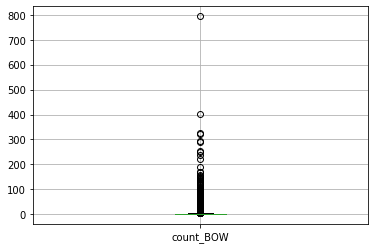

In [36]:
bow_reviewDF.boxplot()

In [37]:
# if isinstance(reviewArray, np.ndarray):
#   print("It's a Numpy array.")

# if isinstance(labels, np.ndarray):
#   print("It's a Numpy array.")

# if isinstance(words_order_asce, np.ndarray):
#   print("It's a Numpy array.")

#### BOW with TF-IDF:

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Define the Tfidf vectorizer:
tfidfVect = TfidfVectorizer()  # Build a matrix of TF-IDF features from all words in the review corpus
tfidf_reviewArray = tfidfVect.fit_transform(reviewCorpus).toarray()

tfidf_reviewDF = pd.DataFrame(tfidf_reviewArray, columns = tfidfVect.get_feature_names())
tfidf_reviewDF

,aa,aaarrrggghhh,abandon,abarca,abbreviated,abduction,ability,abit,able,aboard,...,zep,zeppelin,zero,zeta,zhivago,ziggy,zillion,zr,zydeco,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Show the total number of features:
len(tfidfVect.get_feature_names())

8213

## Split The Training and Testing Datasets:

In [40]:
# Import train_test_split from Sciket Learn for splitting the dataset:
from sklearn.model_selection import train_test_split

In [41]:
reviewArray_train, reviewArray_test, labelArray_train, labelArray_test = train_test_split(
    tfidf_reviewArray, labelArray, test_size = 0.2, random_state = 234)

# Classification

## Naive Bayes Classification:

In [42]:
# Import Gaussian Naive Bayes model from Sciket Learn for classification:
from sklearn.naive_bayes import GaussianNB

In [43]:
nbModel = GaussianNB()

nbModel.fit(reviewArray_train, labelArray_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
label_predict_nb = nbModel.predict(reviewArray_test)

In [45]:
label_predict_nb

array([1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2])

In [46]:
# Import confusion_matrix from Scikit Learn for accuracy evaluation:
from sklearn.metrics import confusion_matrix

In [47]:
confMetrix_nb = confusion_matrix(labelArray_test, label_predict_nb)
confMetrix_nb

array([[75, 27],
       [33, 65]], dtype=int64)

In [48]:
# Import accuracy_score from Scikit Learn for computing the prediction accuracy:
from sklearn.metrics import accuracy_score

In [49]:
print("Accuracy for Naive Bayes Classifier: " + str(accuracy_score(labelArray_test, label_predict_nb) * 100) + "%")

Accuracy for Naive Bayes Classifier: 70.0%


In [50]:
import seaborn as sns

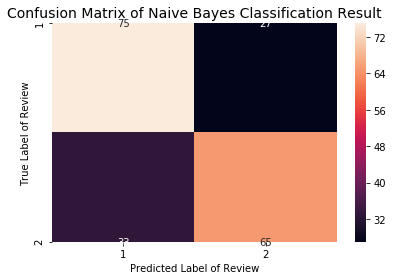

In [51]:
ax = plt.subplot()
sns.heatmap(confMetrix_nb, annot = True)

ax.set_xlabel("Predicted Label of Review")
ax.set_ylabel("True Label of Review")
ax.set_xticklabels(["1", "2"])
ax.set_yticklabels(["1", "2"])
ax.set_title("Confusion Matrix of Naive Bayes Classification Result", fontsize = 14)

plt.tight_layout()

## Random Forest Classification:

In [52]:
# Import RandomForestClassifier from Sciket Learn for classification:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Set the parameter random_state with an abitary number so that the same seed is used by the random number generator in every run.
rfModel = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 456)

rfModel.fit(reviewArray_train, labelArray_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=456,
                       verbose=0, warm_start=False)

In [54]:
label_predict_rf = rfModel.predict(reviewArray_test)

In [55]:
label_predict_rf

array([1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2])

In [56]:
# Import confusion_matrix from Scikit Learn for accuracy evaluation:
from sklearn.metrics import confusion_matrix

In [57]:
confMetrix_rf = confusion_matrix(labelArray_test, label_predict_rf)
confMetrix_rf

array([[75, 27],
       [ 9, 89]], dtype=int64)

In [58]:
# Import accuracy_score from Scikit Learn for computing the prediction accuracy:
from sklearn.metrics import accuracy_score

In [59]:
print("Accuracy for Random Forest Classifier: " + str(accuracy_score(labelArray_test, label_predict_rf) * 100) + "%")

Accuracy for Random Forest Classifier: 82.0%


In [60]:
# plt.matshow(confMetrix)

In [61]:
# Import the Seaborn library for pretty statiscal visualization:
import seaborn as sns

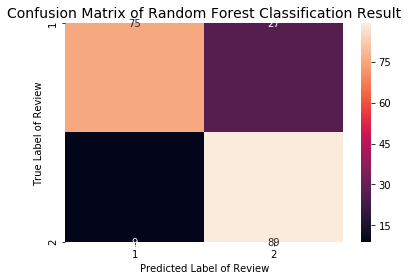

In [62]:
ax = plt.subplot()
sns.heatmap(confMetrix_rf, annot = True)

ax.set_xlabel("Predicted Label of Review")
ax.set_ylabel("True Label of Review")
ax.set_xticklabels(["1", "2"])
ax.set_yticklabels(["1", "2"])
ax.set_title("Confusion Matrix of Random Forest Classification Result", fontsize = 14)

plt.tight_layout()

**NOTE that the results below changes in each runtime:**


Comparison of prediction results based on different # of n_estimators, the prediction achieved highest accuracy at 82.0% while n_estimators = 500 in this experiement using Random Forest approach.


---



## Support Vector Machine (SVM):

In [63]:
# Import SVM from Sciket Learn for classification:
from sklearn import svm

In [64]:
svmModel = svm.SVC(kernel = 'linear')

svmModel.fit(reviewArray_train, labelArray_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
label_predict_svm = svmModel.predict(reviewArray_test)

In [66]:
label_predict_svm

array([1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2])

In [67]:
# Import confusion_matrix from Scikit Learn for accuracy evaluation:
from sklearn.metrics import confusion_matrix

In [68]:
confMetrix_svm = confusion_matrix(labelArray_test, label_predict_svm)
confMetrix_svm

array([[84, 18],
       [12, 86]], dtype=int64)

In [69]:
# Import accuracy_score from Scikit Learn for computing the prediction accuracy:
from sklearn.metrics import accuracy_score

In [70]:
print("Accuracy for SVM Classifier: " + str(accuracy_score(labelArray_test, label_predict_svm) * 100) + "%")

Accuracy for SVM Classifier: 85.0%


In [71]:
import seaborn as sns

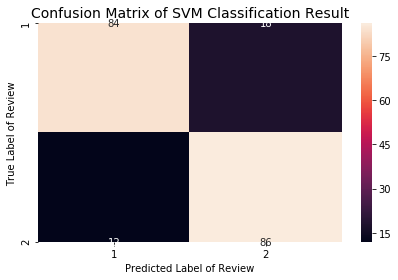

In [72]:
ax = plt.subplot()
sns.heatmap(confMetrix_svm, annot = True)

ax.set_xlabel("Predicted Label of Review")
ax.set_ylabel("True Label of Review")
ax.set_xticklabels(["1", "2"])
ax.set_yticklabels(["1", "2"])
ax.set_title("Confusion Matrix of SVM Classification Result", fontsize = 14)

plt.tight_layout()

# Clustering

## K-means Clustering:

### Find the best *k*:

In [73]:
from sklearn.cluster import KMeans

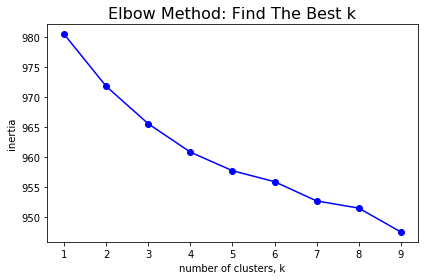

In [74]:
# Find the best number of clusters:
ks = range(1, 10)   # Create a sequence of numbers from 1 to 9.
inertias = []

for k in ks:
  model = KMeans(n_clusters = k, random_state = 1234 )
  # Select the first 2 PCs by calling .iloc[] on the dataframe:
  # .iloc[] is primarily integer position based (from 0 to length-1 of the axis), or you can use the index with : directly.
  model.fit(tfidf_reviewDF.iloc[:, :])  # Select all columns/features of BOW.
  inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title("Elbow Method: Find The Best k", fontsize = 16)

plt.tight_layout()

The scree plot shows a slow decrease of inertia after k = 5, indicating that 5 clusters would be a good choice for the K-means Clustering approach with this dataset.

---



### K-means of all features (words):

In [75]:
k = 5
kmModel = KMeans(n_clusters = k, init = 'k-means++', max_iter = 100, n_init = 1, random_state = 2345)
kmModel.fit(tfidf_reviewArray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [76]:
print("Top 10 terms per Cluster: ")
order_centroids = kmModel.cluster_centers_.argsort()[:, ::-1]
terms = tfidfVect.get_feature_names()

for i in range(k):
  top_term_words = [terms[ind] for ind in order_centroids[i, :10]]
  print("Cluster {}: {}".format(i, ' '.join(top_term_words)))

Top 10 terms per Cluster: 
Cluster 0: product good work sony charger nice battery price power great
Cluster 1: one great work game would time get well money film
Cluster 2: book read reading story one author like time would great
Cluster 3: cd album music song one band sound like heard track
Cluster 4: movie film time bad great watch good story plot make


"great" and "bad" will be the top two features to be used in the following visualation.

---



In [77]:
kmModel.labels_

array([3, 3, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 3, 2, 0,
       1, 1, 1, 3, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 4,
       1, 1, 2, 2, 1, 2, 2, 1, 4, 4, 1, 1, 2, 2, 2, 4, 2, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 0, 1, 2, 1, 1, 4, 4, 4, 1, 1,
       3, 2, 2, 3, 3, 0, 2, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 3, 3, 2, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 3, 0, 3, 3, 1,
       2, 1, 0, 1, 1, 4, 2, 1, 1, 1, 2, 3, 2, 1, 0, 0, 2, 1, 2, 3, 2, 2,
       3, 0, 1, 1, 2, 0, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 3,
       3, 3, 3, 3, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3,
       3, 3, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2,

In [78]:
kmModel.cluster_centers_

array([[ 4.60785923e-19,  3.79470760e-19, -2.43945489e-19, ...,
         1.08420217e-18,  1.30104261e-18, -1.89735380e-19],
       [ 1.19262239e-18,  6.59955877e-04,  4.48604115e-04, ...,
         1.29177432e-03,  1.82664121e-03, -1.89735380e-19],
       [ 8.81257202e-04, -3.25260652e-19, -3.79470760e-19, ...,
        -2.38524478e-18,  1.40946282e-18, -1.89735380e-19],
       [ 3.79470760e-19,  2.71050543e-19, -2.16840434e-19, ...,
         1.08420217e-18,  1.19262239e-18, -1.89735380e-19],
       [ 5.42101086e-19,  3.79470760e-19, -2.43945489e-19, ...,
         1.19262239e-18,  1.30104261e-18,  1.01965155e-03]])

In [79]:
kmResults = pd.DataFrame()
kmResults['review'] = reviewCorpus
kmResults['cluster'] = kmModel.labels_
kmResults

,review,cluster
0,great cd lovely pat one great voice generation...,3
1,one best game music soundtrack game really pla...,3
2,battery died within year bought charger jul wo...,0
3,work fine maha energy better check maha energy...,0
4,great non audiophile reviewed quite bit combo ...,0
...,...,...
995,borinmg dumb waste time glory old time movie t...,4
996,best film year one best film ever made god mon...,1
997,see movie ian mckellen performance god monster...,4
998,best screenplay stability one recent film anti...,1


In [80]:
# Predict a random sentence:
test = tfidfVect.transform(["love the product but shipping was too slow"])
kmPred = kmModel.predict(test)
print("Cluster: ", kmPred)


Cluster:  [0]


### K-means of selected features (words)

In [81]:
kmModelSelected = KMeans(n_clusters = k)
kmModelSelected.fit(tfidf_reviewDF[['great', 'bad']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
tfidf_reviewDF['cluster'] = kmModelSelected.labels_

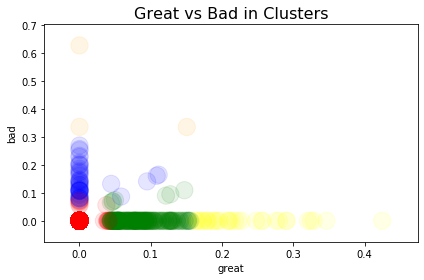

In [83]:
# Create the color palette:
colorPalette = { 0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'orange' }
colors = tfidf_reviewDF.apply(lambda row: colorPalette[row.cluster], axis = 1)

# Create a scatter plot of "great" vs "bad" in clusters:
tfidf_reviewDF.plot(kind = 'scatter', x = 'great', y = 'bad', alpha = 0.1, s = 300, c = colors)

plt.xlabel("great")
plt.ylabel("bad")

plt.title("Great vs Bad in Clusters", fontsize = 16)

plt.tight_layout()

# Regression

In [84]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

## Logistic Regression:

In [85]:
logRegModel = LogisticRegression()

logRegModel.fit(reviewArray_train, labelArray_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
label_predict_logReg = logRegModel.predict(reviewArray_test)

In [87]:
label_predict_logReg

array([1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2])

In [88]:
# Import confusion_matrix from Scikit Learn for accuracy evaluation:
from sklearn.metrics import confusion_matrix

In [89]:
confMetrix_logReg = confusion_matrix(labelArray_test, label_predict_logReg)
confMetrix_logReg

array([[84, 18],
       [10, 88]], dtype=int64)

In [90]:
# Import accuracy_score from Scikit Learn for computing the prediction accuracy:
from sklearn.metrics import accuracy_score

In [91]:
print("Accuracy for Logistic Regression Classifier: " + str(accuracy_score(labelArray_test, label_predict_logReg) * 100) + "%")

Accuracy for Logistic Regression Classifier: 86.0%


In [92]:
# reviewArray_test

In [93]:
# logRegResults = pd.DataFrame()
# logRegResults['review'] = reviewArray_test
# logRegResults['true label'] = labelArray_test
# logRegResults['predicted label'] = logRegModel.labels_
# logRegResults

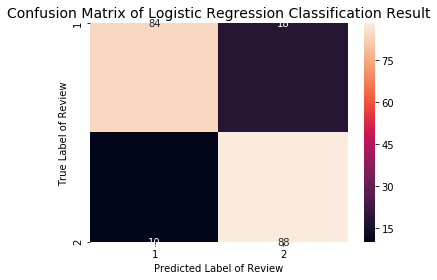

In [94]:
ax = plt.subplot()
sns.heatmap(confMetrix_logReg, annot = True)

ax.set_xlabel("Predicted Label of Review")
ax.set_ylabel("True Label of Review")
ax.set_xticklabels(["1", "2"])
ax.set_yticklabels(["1", "2"])
ax.set_title("Confusion Matrix of Logistic Regression Classification Result", fontsize = 14)

plt.tight_layout()

## Linear Regression:

In [95]:
linRegModel = LinearRegression()

linRegModel.fit(reviewArray_train, labelArray_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
# To retrieve the intercept:
print(linRegModel.intercept_)

1.5352216113227184


In [97]:
# For retrieving the slope:
print(linRegModel.coef_)

[-0.0417829  -0.07961768 -0.03559155 ... -0.17415352  0.31975446
 -0.05825594]


In [98]:
label_predict_linReg = linRegModel.predict(reviewArray_test)

In [99]:
label_predict_linReg

array([0.64276434, 1.20604122, 1.51768789, 1.45364913, 1.66545897,
       1.92511161, 1.52396454, 1.56295065, 1.34234459, 0.92728289,
       1.48865771, 1.8955341 , 1.82682375, 1.55529911, 1.89835069,
       1.07464046, 0.92285682, 1.0417782 , 1.41381056, 1.76762911,
       1.47710334, 1.80776309, 1.33505631, 1.69377866, 1.55144865,
       1.39302615, 1.74824121, 1.18430785, 1.18374357, 1.64374317,
       1.52058048, 1.60716604, 1.13671601, 2.19952277, 1.72657687,
       1.58423439, 1.60909165, 1.57513551, 1.51613294, 0.89178352,
       1.70888026, 1.3614695 , 1.34724885, 1.19383   , 1.61472841,
       1.81120138, 1.63722569, 2.00300293, 1.65989858, 1.70978923,
       1.21035074, 1.65899345, 1.44710211, 1.31965745, 1.8263699 ,
       1.02844061, 2.05811662, 1.42837783, 1.66515056, 1.1182801 ,
       1.92034735, 1.3504024 , 1.27589874, 1.38867761, 2.09230025,
       1.86925869, 1.16645999, 1.83876343, 1.45463968, 1.19377528,
       1.73949217, 1.41009188, 1.53525469, 1.69609932, 1.51349

# Sentiment Analysis

In [101]:
# Import SentimentIntensityAnalyzer from NLTK Vader lexicon:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [102]:
# Define the Vader sentiment analyzer:
vaderAnalyzer = SentimentIntensityAnalyzer()

# Define the function of review rate:
def sentiment_analyzer_scores(text):
  score = vaderAnalyzer.polarity_scores(text)
  print(text)
  print(score)
  print()

  print("Overall, the review is rated as: ")

  if score['compound'] <= -0.05:
    print("Negative (Label: 1)")

  elif score['compound'] >= 0.05:
    print("Positive (Label: 2)")

  else:
    print("Neutral (No Label)")

  print()
  print("-------------------------------------")
  print()
  

In [103]:
text1 = "Lmao, it's so cute~"
text2 = "im very disappointed"
text3 = "The price is good but the quality is trash!"

sentiment_analyzer_scores(text1)
sentiment_analyzer_scores(text2)
sentiment_analyzer_scores(text3)


Lmao, it's so cute~
{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

Overall, the review is rated as: 
Positive (Label: 2)

-------------------------------------

im very disappointed
{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

Overall, the review is rated as: 
Negative (Label: 1)

-------------------------------------

The price is good but the quality is trash!
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.3054}

Overall, the review is rated as: 
Positive (Label: 2)

-------------------------------------



In [104]:
print("=> Original Review:")
sentiment_analyzer_scores(df1.iloc[500, 1])
# print(df1.iloc[0, 1])
# print("=> Sentiment Analysis of the Original Review:")
# print(vaderAnalyzer.polarity_scores(df1.iloc[0, 1]))
# print()

print("=> Cleaned Text of the review:")
sentiment_analyzer_scores(reviewCorpus[500])
# print(reviewCorpus[0])
# print("=> Sentiment Analysis of the Cleaned Text:")
# print(vaderAnalyzer.polarity_scores(reviewCorpus[0]))

print("Actual Label: ",labelArray[500])


=> Original Review:
misleading photo: There was little information about the product other than the photo which showed the Watchtower toys with 3 action figures. We thought that the 3 action figures were included - they were not. Also, do not be fooled by the "too good to be true" price. They charge so much for shipping it costs the same as you would pay in a store.Otherwise, the package arrived in a timely manner, was in good condition and appeared to be from a legitamate supplier.
{'neg': 0.047, 'neu': 0.829, 'pos': 0.124, 'compound': 0.7707}

Overall, the review is rated as: 
Positive (Label: 2)

-------------------------------------

=> Cleaned Text of the review:
misleading photo little information product photo showed watchtower toy action figure thought action figure included also fooled good true price charge much shipping cost would pay store otherwise package arrived timely manner good condition appeared legitamate supplier
{'neg': 0.145, 'neu': 0.67, 'pos': 0.186, 'compound'